In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# get JSON formatted and cleaned version of Johns Hopkins data
URL = 'https://pomber.github.io/covid19/timeseries.json'
import requests
r = requests.get(URL)
import json
data_dict = r.json()

# read world bank population data
pop_data = pd.read_csv('WB-population-data.csv', skiprows=4, index_col='Country Name')

# read world bank death rate data
dr_data = pd.read_csv('wb-death-rate.csv', skiprows=3, index_col='Country Name')

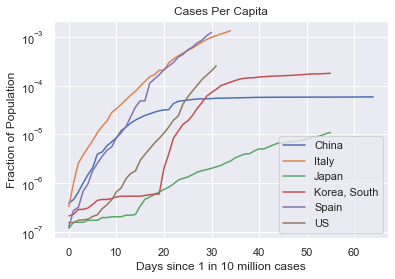

In [3]:
for k in data_dict.keys():
    if k in ['US', 'Italy', 'Spain', 'China', 'Korea, South', 'Japan']:
        pop = pop_data.loc[k]['2018']
        data = pd.DataFrame(data_dict[k])['confirmed']
        data = data/pop
        # truncate data below 1/1e7
        data = data[data>1e-7]
        plt.plot(data.values, label=k)
plt.yscale('log')
plt.title('Cases Per Capita')
plt.xlabel('Days since 1 in 10 million cases')
plt.ylabel('Fraction of Population')
plt.legend()
plt.show()

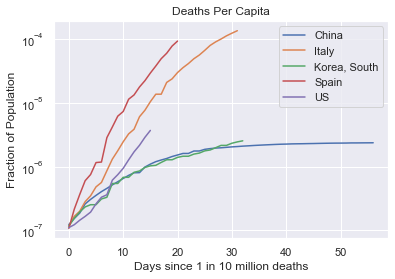

In [4]:
for k in data_dict.keys():
    #if k in ['US', 'Italy', 'Spain', 'China', 'Korea, South', 'Japan', 'United Kingdom']:
    if k in ['US', 'Italy', 'Spain', 'China', 'Korea, South']:
        pop = pop_data.loc[k]['2018']
        data = pd.DataFrame(data_dict[k])['deaths']
        data = data/pop
        # truncate data below 1/1e7
        data = data[data>1e-7]
        plt.plot(data.values, label=k)
plt.yscale('log')
plt.title('Deaths Per Capita')
plt.xlabel('Days since 1 in 10 million deaths')
plt.ylabel('Fraction of Population')
plt.legend()
plt.show()

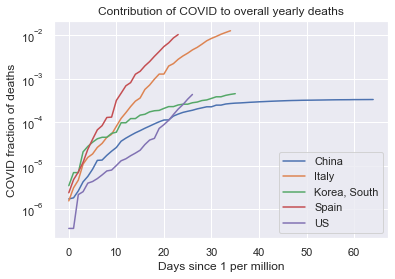

In [5]:
# normalize by death rate
# take population and multiply by death rate gives deaths per year
# divide the COVID deaths by deaths per year to get COVID contribution

dr_data = pd.read_csv('wb-death-rate.csv', skiprows=3, index_col='Country Name')
pop_data = pd.read_csv('WB-population-data.csv', skiprows=4, index_col='Country Name')

for country in data_dict.keys():
    if country in ['US', 'Italy', 'Spain', 'China', 'Korea, South']:
        pop = pop_data.loc[country]['2018']
        death_rate = dr_data.loc[country]['2017'] / 1000
        overall_deaths = pop * death_rate
        covid_deaths = pd.DataFrame(data_dict[country])['deaths']
        covid_deaths = covid_deaths / overall_deaths
        # truncate data below 1/1e7
        covid_deaths = covid_deaths[covid_deaths>1e-7]
        plt.plot(covid_deaths.values, label=country)
plt.yscale('log')
plt.title('Contribution of COVID to overall yearly deaths')
plt.xlabel('Days since 1 per million')
plt.ylabel('COVID fraction of deaths')
plt.legend()
plt.show()